In [2]:
import sys
import time

import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import time
import csv

In [16]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

METRICS = [
	keras.metrics.TruePositives(name='tp'),
	keras.metrics.FalsePositives(name='fp'),
	keras.metrics.TrueNegatives(name='tn'),
	keras.metrics.FalseNegatives(name='fn'),
	keras.metrics.BinaryAccuracy(name='accuracy'),
	keras.metrics.Precision(name='precision'),
	keras.metrics.Recall(name='recall'),
	keras.metrics.AUC(name='auc'),
	keras.metrics.AUC(name='prc', curve='PR'),  # precision-recall curve
]

In [17]:
def plot_loss(history, label, n):
	# Use a log scale on y-axis to show the wide range of values.
	plt.semilogy(history.epoch, history.history['loss'],
			   color=colors[n], label='Train ' + label)
	plt.semilogy(history.epoch, history.history['val_loss'],
			   color=colors[n], label='Val ' + label,
			   linestyle="--")
	plt.xlabel('Epoch')
	plt.ylabel('Loss')
	plt.legend()


def plot_metrics(history):
	metrics = ['loss', 'prc', 'precision', 'recall']
	for n, metric in enumerate(metrics):
		name = metric.replace("_", " ").capitalize()
		plt.subplot(2, 2, n + 1)
		plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
		plt.plot(history.epoch, history.history['val_' + metric],
				 color=colors[0], linestyle="--", label='Val')
		plt.xlabel('Epoch')
		plt.ylabel(name)
		if metric == 'loss':
			plt.ylim([0, plt.ylim()[1]])
		elif metric == 'auc':
			plt.ylim([0.8, 1.1])
		else:
			plt.ylim([0, 1.1])

		plt.legend();

def plot_cm(labels, predictions, title, p=0.5):
	cm = confusion_matrix(labels, predictions > p)
	plt.figure(figsize=(5, 5))
	sns.heatmap(cm, annot=True, fmt="d")
	# plt.title('Confusion matrix @{:.2f}'.format(p))
	plt.title(title)
	plt.ylabel('Actual label')
	plt.xlabel('Predicted label')

	print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
	print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
	print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
	print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
	print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [18]:
dataset_path = 'tensorflow_group_datasets/one_res_small/0_no_leaks_rand_base_demand/'

out_filename = '1M_one_res_small_leaks_ordered_group_0_node_0_0164_merged.csv'
raw_df1 = pd.read_csv(dataset_path+out_filename, delimiter=";")



In [6]:
EPOCHS = 100
BATCH_SIZE = 2048


In [20]:

leak_area = "0164" # "0246" #"0164"
# 1-->7 2-->7 3-->6 4-->2 5-->1 6-->7 7-->7
leak_group = 3
leak_group_model = 7

dataset_path = "tensorflow_group_datasets/model/h5/"
model_filename = "model_leak_group"+str(leak_group)+"_train_node_"+str(leak_group_model)+".h5"
loaded_model = tf.keras.models.load_model(dataset_path+model_filename)

# tf.keras.utils.plot_model(loaded_model, to_file='model_plot.png', show_shapes=True)

# tf.keras.utils.plot_model(
#     loaded_model,
#     to_file='tensorflow_group_datasets/model_plot.png',
#     show_shapes=True,
#     show_dtype=False,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=False,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=False,
# )


leak node :  1
Examples:
    Total: 107520
    Positive: 6720 (6.25% of total)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
loss :  0.20978672802448273
accuracy :  0.9432198405265808
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warnin

C:\Users\Domenico\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

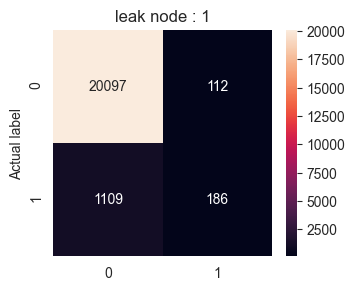

In [24]:
leak_area = "0164" # "0246" #"0164"
# 1-->7 2-->7 3-->6 4-->2 5-->1 6-->7 7-->7
leak_group = 7
leak_group_model = 7

dataset_path = "tensorflow_group_datasets/model/h5/"
model_filename = "model_leak_group"+str(leak_group)+"_train_node_"+str(leak_group_model)+".h5"
loaded_model = tf.keras.models.load_model(dataset_path+model_filename)

dataset_path = 'tensorflow_group_datasets/one_res_small/1_at_82_leaks_rand_base_demand/'

# plt.figure(figsize=(5, 5))
fig = plt.figure()


for leak_node in range(1,10,1):
	print("leak node : ", leak_node)
	out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
	raw_df2 = pd.read_csv(dataset_path+out_filename, delimiter=";")

    # Appending multiple DataFrame
	raw_df = pd.concat([raw_df1, raw_df2])
	raw_df.reset_index(drop=True, inplace=True)

	cleaned_df = raw_df.copy()
	pop_col = ['hour', 'nodeID', 'node_type', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value', 'has_leak' ]

	cleaned_df = cleaned_df.drop(pop_col, axis=1)
	cleaned_df.rename(columns = {'leak_group':'Class'}, inplace = True)

	#%%
	neg, pos = np.bincount(cleaned_df['Class'])
	total = neg + pos
	print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
		total, pos, 100 * pos / total))

	#%%
	# Use a utility from sklearn to split and shuffle your dataset.
	train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
	train_df, val_df = train_test_split(train_df, test_size=0.2)

	# Form np arrays of labels and features.
	train_labels = np.array(train_df.pop('Class'))
	bool_train_labels = train_labels != 0
	val_labels = np.array(val_df.pop('Class'))
	test_labels = np.array(test_df.pop('Class'))

	train_features = np.array(train_df)
	val_features = np.array(val_df)
	test_features = np.array(test_df)

	#%%
	scaler = StandardScaler()
	train_features = scaler.fit_transform(train_features)
	val_features = scaler.transform(val_features)
	test_features = scaler.transform(test_features)

	#%%
	# pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
	# neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)


	# baseline_results =loaded_model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
	# for name, value in zip(loaded_model.metrics_names, baseline_results):
	# 	if name == "loss":
	# 		loss = value
	# 		print(name, ': ', value)
	# 	if name == "accuracy":
	# 		acc = value
	# 	print(name, ': ', value)
	# print()
	#
	#
	# baseline_results =loaded_model.evaluate(val_features, val_labels, batch_size=BATCH_SIZE, verbose=0)
	# for name, value in zip(loaded_model.metrics_names, baseline_results):
	# 	if name == "loss":
	# 		loss = value
	# 		print(name, ': ', value)
	# 	if name == "accuracy":
	# 		acc = value
	# 	print(name, ': ', value)
	# print()

	baseline_results =loaded_model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)
	for name, value in zip(loaded_model.metrics_names, baseline_results):
		# print(name, ': ', value)
		if name == "loss":
			loss = value
			print(name, ': ', value)
		if name == "accuracy":
			acc = value
			print(name, ': ', value)

	test_predictions_baseline = loaded_model.predict(test_features, batch_size=BATCH_SIZE)

	# plot_cm(test_labels, test_predictions_baseline, "leak node : "+str(leak_node))
	p=0.5

	cm = confusion_matrix(test_labels, test_predictions_baseline > p)
	# plt.figure(figsize=(5, 5))
	ax1 = fig.add_subplot(3, 3, leak_node)
	sns.heatmap(cm, annot=True, fmt="d")

	plt.title("leak node : "+str(leak_node))

	if leak_node in [1, 4, 7]:
		plt.ylabel('Actual label')
	if leak_node in [7, 8, 9]:
		plt.xlabel('Predicted label')


	#create scalar file


	not_scaled_df = raw_df2.copy()
	pop_col_not_scaled_df = ['base_demand', 'demand_value', 'head_value', 'pressure_value', 'x_pos', 'y_pos',
							 'flow_demand_in', 'demand_0', 'head_0', 'pressure_0',
							 'demand_1', 'head_1', 'pressure_1', 'demand_2', 'head_2', 'pressure_2',
							 'demand_3', 'head_3', 'pressure_3', 'demand_4', 'head_4', 'pressure_4',
							 'demand_5', 'head_5', 'pressure_5', 'demand_6', 'head_6', 'pressure_6',
							 'demand_7', 'head_7', 'pressure_7', 'demand_8', 'head_8', 'pressure_8',
							 'demand_9', 'head_9', 'pressure_9', 'flow_demand_out', 'leak_group']
	not_scaled_df = not_scaled_df.drop(pop_col_not_scaled_df, axis=1)

	scaled_df = raw_df2.copy()
	pop_col_scaled_df = ['hour', 'nodeID', 'node_type', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value', 'has_leak' ]
	scaled_df = scaled_df.drop(pop_col_scaled_df, axis=1)
	# scaled_df.rename(columns = {'leak_group':'Class'}, inplace = True)
	pop_col_scaled_df_2 = ['leak_group']
	scaled_df = scaled_df.drop(pop_col_scaled_df_2, axis=1)

	scaled_columns_names = scaled_df.columns
	columns_names_scalar = []
	for kk in range(len(scaled_columns_names)):
		columns_names_scalar.append(scaled_columns_names[kk]+"_scalar")

	cleaned_df_for_scalar_new_columns = pd.DataFrame(data=scaled_df, columns=columns_names_scalar)
	cleaned_df_for_scalar_new_columns = scaler.transform(cleaned_df_for_scalar_new_columns)

	raw_df_for_scalar_final = pd.concat([not_scaled_df, cleaned_df_for_scalar_new_columns], axis=1)
	out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged_scalar.csv"
	raw_df_for_scalar_final.to_csv(dataset_path+out_filename, float_format='%.8f', index=False, sep=';')
	!
	quit(1)

fig_output_filename = "tensorflow_group_datasets/fig/" + "model_leak_group" + str(leak_group) + "_train_node_" + str(leak_group_model) + ".png"
plt.savefig(fig_output_filename, dpi=300, bbox_inches="tight")



In [4]:
dataset_path = 'tensorflow_group_datasets/one_res_small/0_no_leaks_rand_base_demand/'

out_filename = '1M_one_res_small_leaks_ordered_group_0_node_0_0164_merged.csv'
raw_df1 = pd.read_csv(dataset_path+out_filename, delimiter=";")

In [9]:
leak_area = "0164" # "0246" #"0164"
# 1-->7 2-->7 3-->6 4-->2 5-->1 6-->7 7-->7
leak_group = 7
leak_group_model = 7

dataset_path = "tensorflow_group_datasets/model/h5/"
model_filename = "model_leak_group"+str(leak_group)+"_train_node_"+str(leak_group_model)+".h5"
loaded_model = tf.keras.models.load_model(dataset_path+model_filename)

dataset_path = 'tensorflow_group_datasets/one_res_small/1_at_82_leaks_rand_base_demand/'

# plt.figure(figsize=(5, 5))
fig = plt.figure()


for leak_node in range(7,8,1):
	print("leak node : ", leak_node)
	out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
	raw_df2 = pd.read_csv(dataset_path+out_filename, delimiter=";")

    # Appending multiple DataFrame
	raw_df = pd.concat([raw_df1, raw_df2])
	raw_df.reset_index(drop=True, inplace=True)

	cleaned_df = raw_df.copy()
	pop_col = ['hour', 'nodeID', 'node_type', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value', 'has_leak' ]

	cleaned_df = cleaned_df.drop(pop_col, axis=1)
	cleaned_df.rename(columns = {'leak_group':'Class'}, inplace = True)

	#%%
	neg, pos = np.bincount(cleaned_df['Class'])
	total = neg + pos
	print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
		total, pos, 100 * pos / total))

	#%%
	# Use a utility from sklearn to split and shuffle your dataset.
	train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
	train_df, val_df = train_test_split(train_df, test_size=0.2)

	# Form np arrays of labels and features.
	train_labels = np.array(train_df.pop('Class'))
	bool_train_labels = train_labels != 0
	val_labels = np.array(val_df.pop('Class'))
	test_labels = np.array(test_df.pop('Class'))

	train_features = np.array(train_df)
	val_features = np.array(val_df)
	test_features = np.array(test_df)

	#%%
	scaler = StandardScaler()
	train_features = scaler.fit_transform(train_features)
	val_features = scaler.transform(val_features)
	test_features = scaler.transform(test_features)

	#%%
	# pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
	# neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)


	# baseline_results =loaded_model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
	# for name, value in zip(loaded_model.metrics_names, baseline_results):
	# 	if name == "loss":
	# 		loss = value
	# 		print(name, ': ', value)
	# 	if name == "accuracy":
	# 		acc = value
	# 	print(name, ': ', value)
	# print()
	#
	#
	# baseline_results =loaded_model.evaluate(val_features, val_labels, batch_size=BATCH_SIZE, verbose=0)
	# for name, value in zip(loaded_model.metrics_names, baseline_results):
	# 	if name == "loss":
	# 		loss = value
	# 		print(name, ': ', value)
	# 	if name == "accuracy":
	# 		acc = value
	# 	print(name, ': ', value)
	# print()

	# baseline_results =loaded_model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)
	# for name, value in zip(loaded_model.metrics_names, baseline_results):
	# 	# print(name, ': ', value)
	# 	if name == "loss":
	# 		loss = value
	# 		print(name, ': ', value)
	# 	if name == "accuracy":
	# 		acc = value
	# 		print(name, ': ', value)
	#
	# test_predictions_baseline = loaded_model.predict(test_features, batch_size=BATCH_SIZE)
	#
	# # plot_cm(test_labels, test_predictions_baseline, "leak node : "+str(leak_node))
	# p=0.5
	#
	# cm = confusion_matrix(test_labels, test_predictions_baseline > p)
	# # plt.figure(figsize=(5, 5))
	# ax1 = fig.add_subplot(3, 3, leak_node)
	# sns.heatmap(cm, annot=True, fmt="d")
	#
	# plt.title("leak node : "+str(leak_node))

	#
	#
	# #create scalar file
	#
	#
	# not_scaled_df = raw_df2.copy()
	# pop_col_not_scaled_df = ['base_demand', 'demand_value', 'head_value', 'pressure_value', 'x_pos', 'y_pos',
	# 						 'flow_demand_in', 'demand_0', 'head_0', 'pressure_0',
	# 						 'demand_1', 'head_1', 'pressure_1', 'demand_2', 'head_2', 'pressure_2',
	# 						 'demand_3', 'head_3', 'pressure_3', 'demand_4', 'head_4', 'pressure_4',
	# 						 'demand_5', 'head_5', 'pressure_5', 'demand_6', 'head_6', 'pressure_6',
	# 						 'demand_7', 'head_7', 'pressure_7', 'demand_8', 'head_8', 'pressure_8',
	# 						 'demand_9', 'head_9', 'pressure_9', 'flow_demand_out', 'leak_group']
	# not_scaled_df = not_scaled_df.drop(pop_col_not_scaled_df, axis=1)
	#
	# scaled_df = raw_df2.copy()
	# pop_col_scaled_df = ['hour', 'nodeID', 'node_type', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value', 'has_leak' ]
	# scaled_df = scaled_df.drop(pop_col_scaled_df, axis=1)
	# # scaled_df.rename(columns = {'leak_group':'Class'}, inplace = True)
	# pop_col_scaled_df_2 = ['leak_group']
	# scaled_df = scaled_df.drop(pop_col_scaled_df_2, axis=1)
	#
	# scaled_columns_names = scaled_df.columns
	# columns_names_scalar = []
	# for kk in range(len(scaled_columns_names)):
	# 	columns_names_scalar.append(scaled_columns_names[kk]+"_scalar")
	#
	# cleaned_df_for_scalar_new_columns = pd.DataFrame(data=scaled_df, columns=columns_names_scalar)
	# cleaned_df_for_scalar_new_columns = scaler.transform(cleaned_df_for_scalar_new_columns)

	# print(test2_features_2[0:1])
	# print(test2_labels_2[0:1])
	for ii in range(100):
		print(ii)
		print(test_labels[ii:ii+1])
		print(loaded_model.predict(test_features[ii:ii+1], batch_size=BATCH_SIZE))
		print("")
		time.sleep(1)

leak node :  7
Examples:
    Total: 107520
    Positive: 6720 (6.25% of total)

0
[False]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 87ms/step
[[4.4299173e-14]]

1
[False]
1/1 [==============================] - 0s 23ms/step
[[1.649783e-13]]

2
[False]
1/1 [==============================] - 0s 22ms/step
[[0.0007891]]

3
[False]
1/1 [==============================] - 0s 21ms/ste

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [45]:
leak_area = "0164" # "0246" #"0164"
# 1-->7 2-->7 3-->6 4-->2 5-->1 6-->7 7-->7
leak_group = 7
leak_group_model = 7

dataset_path = "tensorflow_group_datasets/model/h5/"
model_filename = "model_leak_group"+str(leak_group)+"_train_node_"+str(leak_group_model)+".h5"
loaded_model = tf.keras.models.load_model(dataset_path+model_filename)

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the model.
dataset_tflite_path = "tensorflow_group_datasets/model/tflite/"
model_tflite_filename = "model_leak_group"+str(leak_group)+"_train_node_"+str(leak_group_model)+".tflite"
with open(dataset_tflite_path+model_tflite_filename, 'wb') as f:
  f.write(tflite_model)


# dataset_path = 'tensorflow_group_datasets/one_res_small/1_at_82_leaks_rand_base_demand/'
dataset_path = 'tensorflow_group_datasets/one_res_small/1_at_82_leaks_rand_base_demand_scalar/'

# plt.figure(figsize=(5, 5))
fig = plt.figure()


for leak_node in range(7,8,1):
	print("leak node : ", leak_node)
	# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
	out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged_scalar.csv"
	raw_df2 = pd.read_csv(dataset_path+out_filename, delimiter=";")

    # Appending multiple DataFrame
	# raw_df = pd.concat([raw_df1, raw_df2])
	raw_df = pd.concat([raw_df2])
	raw_df.reset_index(drop=True, inplace=True)

	cleaned_df = raw_df.copy()
	pop_col = ['hour', 'nodeID', 'node_type', 'leak_area_value', 'leak_discharge_value', 'leak_demand_value', 'has_leak' ]

	cleaned_df = cleaned_df.drop(pop_col, axis=1)
	# cleaned_df.rename(columns = {'leak_group':'Class'}, inplace = True)

	# #%%
	# neg, pos = np.bincount(cleaned_df['Class'])
	# total = neg + pos
	# print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
	# 	total, pos, 100 * pos / total))

	#%%
	# Use a utility from sklearn to split and shuffle your dataset.
	# train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
	# train_df, val_df = train_test_split(train_df, test_size=0.2)

	train_val_test_df = cleaned_df
	print(cleaned_df.columns)
	sys.exit(1)

	# Form np arrays of labels and features.
	# train_labels = np.array(train_val_test_df.pop('Class'))

	train_features = np.array(train_val_test_df)

	#%%
	# scaler = StandardScaler()
	# train_features = scaler.fit_transform(train_features)

	# test_predictions_baseline = loaded_model.predict(test_features, batch_size=BATCH_SIZE)
	p=0.3
	# cm = confusion_matrix(test_labels, test_predictions_baseline > p)
	# print(cm)

	for ii in range(180):
		print('******', ii, '************')
		current_label = raw_df.loc[ii, ["has_leak"]].values
		print(raw_df.loc[ii, ["hour", "nodeID", "has_leak"]].values)
		# print(raw_df.loc[ii, ["hour", "nodeID", "has_leak", "leak_group"]].values)
		# current_label = train_labels[ii]
		print(current_label)
		current_prediction = loaded_model.predict(train_features[ii:ii+1], batch_size=BATCH_SIZE)>p
		print(current_prediction)
		# if not current_prediction == current_label:
		# 	sys.exit(1)
		# time.sleep(0.3)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: C:\Users\Domenico\AppData\Local\Temp\tmp770yfbkq\assets


INFO:tensorflow:Assets written to: C:\Users\Domenico\AppData\Local\Temp\tmp770yfbkq\assets


leak node :  7
Index(['base_demand_scalar', 'demand_value_scalar', 'head_value_scalar',
       'pressure_value_scalar', 'x_pos_scalar', 'y_pos_scalar',
       'flow_demand_in_scalar', 'demand_0_scalar', 'head_0_scalar',
       'pressure_0_scalar', 'demand_1_scalar', 'head_1_scalar',
       'pressure_1_scalar', 'demand_2_scalar', 'head_2_scalar',
       'pressure_2_scalar', 'demand_3_scalar', 'head_3_scalar',
       'pressure_3_scalar', 'demand_4_scalar', 'head_4_scalar',
       'pressure_4_scalar', 'demand_5_scalar', 'head_5_scalar',
       'pressure_5_scalar', 'demand_6_scalar', 'head_6_scalar',
       'pressure_6_scalar', 'demand_7_scalar', 'head_7_scalar',
       'pressure_7_scalar', 'demand_8_scalar', 'head_8_scalar',
       'pressure_8_scalar', 'demand_9_scalar', 'head_9_scalar',
       'pressure_9_scalar', 'flow_demand_out_scalar'],
      dtype='object')


SystemExit: 1

c:\python3\lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 640x480 with 0 Axes>

In [44]:
#verify Tensorflow lite
interpreter = tf.lite.Interpreter(model_path=dataset_tflite_path+model_tflite_filename)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("tf lite float")

print(input_details)
print(output_details)

# for i in range(len(validation_data_set)):
#     interpreter.set_tensor(input_details[0]['index'], validation_data_set[i])
#     interpreter.invoke()
#     preds_tf_lite = interpreter.get_tensor(output_details[0]['index'])
#     print('Predicted:', decode_predictions(preds_tf_lite, top=3)[0])
#
#
input_data = np.float32(train_features)
for ii in range(180):
	print('******', ii, '************')
	current_label = raw_df.loc[ii, ["has_leak"]].values
	print(raw_df.loc[ii, ["hour", "nodeID", "has_leak"]].values)
	# print(raw_df.loc[ii, ["hour", "nodeID", "has_leak", "leak_group"]].values)
	# current_label = train_labels[ii]
	print(current_label)
	# current_prediction = loaded_model.predict(train_features[ii:ii+1], batch_size=BATCH_SIZE)>p
	interpreter.set_tensor(input_details[0]['index'], input_data[ii:ii+1])
	interpreter.invoke()
	preds_tf_lite = interpreter.get_tensor(output_details[0]['index'])
	print('Predicted:', preds_tf_lite)
	# print(current_prediction)
	# if not current_prediction == current_label:
	# 	sys.exit(1)
	time.sleep(3)


tf lite float
[{'name': 'serving_default_dense_40_input:0', 'index': 0, 'shape': array([ 1, 38]), 'shape_signature': array([-1, 38]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 7, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
****** 0 ************
['0:00:00' '8614' False]
[False]
Predicted: [[2.0158363e-12]]
****** 1 ************
['0:00:00' '8600' False]
[False]
Predicted: [[2.1630026e-12]]
****** 2 ************
['0:00:00' '8610' False]
[False]
Predicted: [[1.9616422e-12]]
****** 3 ************
['0:00:00' '9402' False]
[False]
Predicted: [

KeyboardInterrupt: 